In [1]:

import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [2]:
# import the necessary packages 
from tensorflow.keras.layers import Input

# Normal libraries
import pandas as pd
import numpy as np
import os
import shutil

# pickle
import pickle as pk
#import cv2

#
from IPython.display import Image

# visualization libraries
import matplotlib.pyplot as plt

# sklearn libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# sklearn tensorflow.keras  libraries
from tensorflow.keras.models  import Sequential, load_model
from tensorflow.keras  import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import binary_crossentropy, categorical_crossentropy
from tensorflow.keras import optimizers



In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras.utils import to_categorical



In [4]:
data_class_df = pd.read_csv('/Users/amateos88/code/vivekptl9/Anaemia_Classification/sample_dataset/sickle_slides_new_march.txt')
data_class_df.shape

(161, 2)

In [5]:
with open('/Users/amateos88/Desktop/Anaemia/pictures_array.npy', 'rb') as f:
    images = np.load(f)

In [6]:
with open('/Users/amateos88/Desktop/Anaemia/labels_array.npy', 'rb') as f:
    labels = np.load(f)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3)

In [8]:
from tensorflow.keras.applications.resnet50 import ResNet50

resnet = ResNet50(weights='imagenet',include_top=False)
resnet.summary()

2022-09-02 15:17:16.939141: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-02 15:17:16.941504: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-02 15:17:16.942352: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
          

In [18]:
x = resnet.output
x = layers.GlobalAveragePooling2D()(x)
x = Dense(64, activation='sigmoid')(x) #init
x = Dense(32, activation= 'relu')(x) #init
x = Dense(128, activation= 'sigmoid')(x)
x = Dense(128, activation='relu')(x) 
x = Dense(256, activation='relu')(x) 
x = Dense(512, activation='sigmoid')(x)
x = Dense(1028, activation='relu')(x)
# # x = Dense(2056, activation='relu')(x)
# # x = Dense(1028, activation='relu')(x)
# # x = Dense(1028, activation='relu')(x)
# # x = Dense(2056, activation='relu')(x)
# # x = Dense(1028, activation='relu')(x)
# # x = Dense(512, activation='relu')(x)
# # x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x) #init
predictions = Dense(1, activation='sigmoid')(x)

# # let's define the input tensor
 #input_tensor = Input(shape=(224, 224, 3))

# # this is the model we will train
model = models.Model(inputs=resnet.input, outputs=predictions)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                         

In [10]:
for layer in resnet.layers:
      layer.trainable = False


In [11]:
adam_opt = optimizers.Adam(learning_rate=0.007, beta_1=0.9, beta_2=0.99)
model.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics= 'accuracy')

In [12]:
es = callbacks.EarlyStopping(patience=40, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=15,  # Use early stopping in practice
                    batch_size=8, 
                    validation_split= 0.2,
                    #callbacks=[es],
                    verbose=1)

Epoch 1/30


2022-09-02 15:17:23.984864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


132/132 [==============================] - ETA: 0s - loss: 0.6844 - accuracy: 0.5766

2022-09-02 15:17:33.535790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


132/132 [==============================] - 15s 86ms/step - loss: 0.6844 - accuracy: 0.5766 - val_loss: 0.6420 - val_accuracy: 0.6920
Epoch 2/30
132/132 [==============================] - 8s 60ms/step - loss: 0.6802 - accuracy: 0.5861 - val_loss: 0.6624 - val_accuracy: 0.6920
Epoch 3/30
132/132 [==============================] - 8s 60ms/step - loss: 0.6798 - accuracy: 0.5861 - val_loss: 0.6098 - val_accuracy: 0.6920
Epoch 4/30
132/132 [==============================] - 8s 59ms/step - loss: 0.6601 - accuracy: 0.5861 - val_loss: 0.6160 - val_accuracy: 0.6920
Epoch 5/30
132/132 [==============================] - 8s 59ms/step - loss: 0.6388 - accuracy: 0.5861 - val_loss: 0.6603 - val_accuracy: 0.6920
Epoch 6/30
132/132 [==============================] - 8s 61ms/step - loss: 0.6517 - accuracy: 0.5633 - val_loss: 0.6708 - val_accuracy: 0.6920
Epoch 7/30
132/132 [==============================] - 8s 60ms/step - loss: 0.6493 - accuracy: 0.5861 - val_loss: 0.6136 - val_accuracy: 0.6920
Epoch 8/3

In [13]:
model.evaluate(X_test, y_test)

18/18 [==============================] - 3s 158ms/step - loss: 0.5725 - accuracy: 0.6968


[0.5724582076072693, 0.6968085169792175]

In [1]:
#model.save('/Users/amateos88/code/vivekptl9/Anaemia_Classification/Model/72')

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

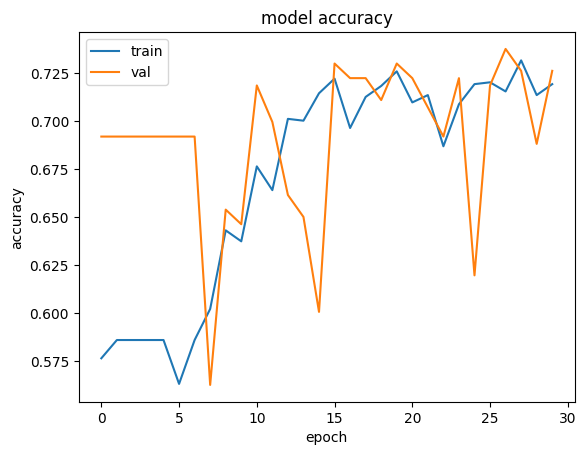

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

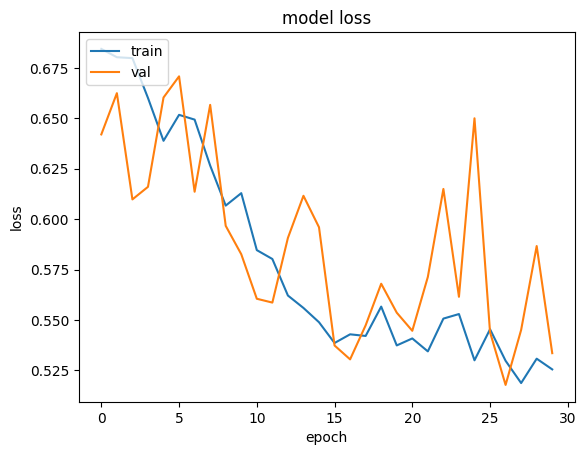

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred_df = pd.DataFrame(pred_test,columns=['values'])
pred_df.sort_values(by='values').head(20)

NameError: name 'pred_test' is not defined